In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

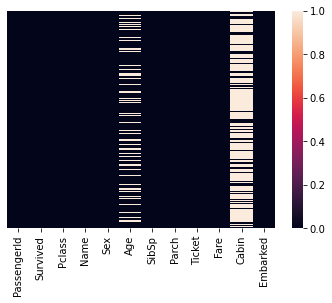

In [5]:
sns.heatmap(df.isnull(), yticklabels=False)

In [6]:
df['Survived'].unique()

array([0, 1])

In [7]:
df['Age'].mean()

29.69911764705882

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

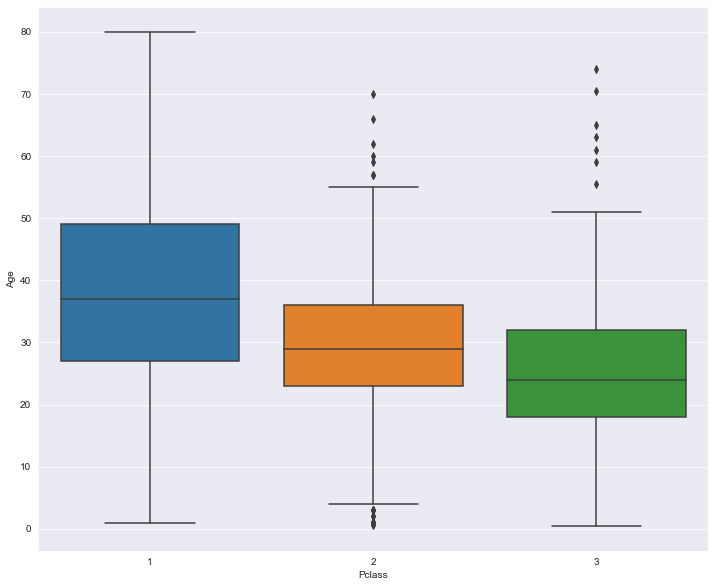

In [8]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,10))
sns.boxplot(x='Pclass', y='Age', data=df)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

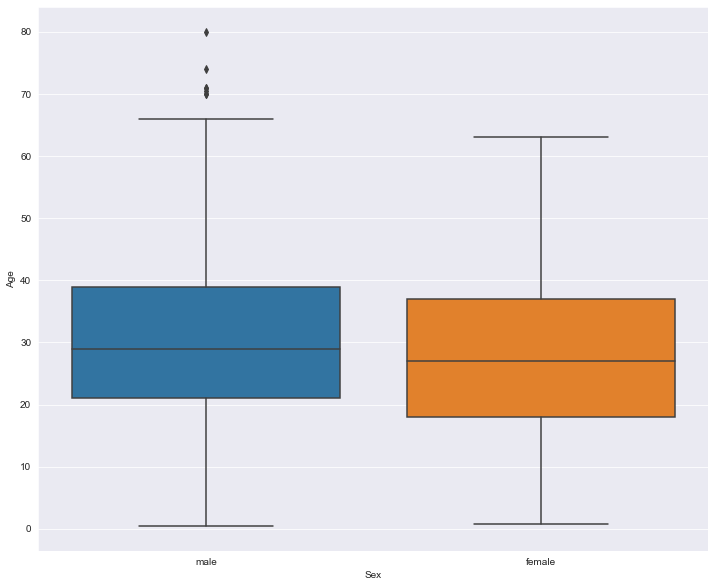

In [9]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Sex', y='Age', data=df)

In [10]:
df.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [11]:
def updateAge(data):
    age = data[0]
    pclass = data[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 30
        else:
            return 25
    else:
        return age

In [12]:
df['Age'] = df[['Age', 'Pclass']].apply(updateAge, axis=1)

<AxesSubplot:>

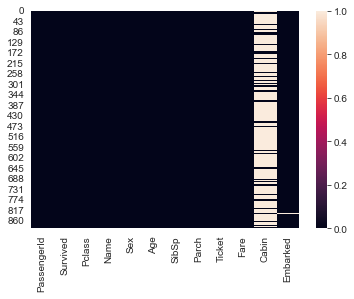

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.drop('Cabin', axis=1, inplace=True)

In [15]:
df.dropna(inplace=True)

<AxesSubplot:>

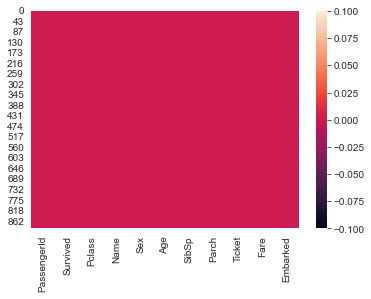

In [16]:
sns.heatmap(df.isnull())

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [18]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [19]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [20]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [21]:
embarked = pd.get_dummies(df['Embarked'], drop_first=True)
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
df.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [24]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [25]:
df = pd.concat([df, sex, embarked], axis=1)

In [26]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [27]:
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [30]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,25.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lg = LogisticRegression()

In [34]:
lg.fit(X_train, y_train)

/Volumes/Kriti-1/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
predictions = lg.predict(X_test)

In [37]:
predictions

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0])

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
confusion_matrix(y_test, predictions)

array([[139,  26],
       [ 35,  67]])

In [41]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       165
           1       0.72      0.66      0.69       102

    accuracy                           0.77       267
   macro avg       0.76      0.75      0.75       267
weighted avg       0.77      0.77      0.77       267



In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier(7)

In [44]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [46]:
kPredictions = knn.predict(X_test)

In [47]:
print(classification_report(y_test, kPredictions))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       165
           1       0.63      0.70      0.66       102

    accuracy                           0.73       267
   macro avg       0.71      0.72      0.72       267
weighted avg       0.73      0.73      0.73       267



In [48]:
ks = list(range(1, 50, 2))

In [53]:
scores = []

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
for k in ks:
    knn = KNeighborsClassifier(k)
    score = cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()
    print("Accuracy with", k, "neighbours:", score)
    scores.append(score)

Accuracy with 1 neighbours: 0.6828032755665587
Accuracy with 3 neighbours: 0.7052942296705389
Accuracy with 5 neighbours: 0.6861931060750333
Accuracy with 7 neighbours: 0.7008188916396876
Accuracy with 9 neighbours: 0.6951818701199771
Accuracy with 11 neighbours: 0.6963245096172158
Accuracy with 13 neighbours: 0.7042087221481623
Accuracy with 15 neighbours: 0.7154510252015489
Accuracy with 17 neighbours: 0.7143337776931378
Accuracy with 19 neighbours: 0.709833047673459
Accuracy with 21 neighbours: 0.6952390020948391
Accuracy with 23 neighbours: 0.7008442836285151
Accuracy with 25 neighbours: 0.7019869231257538
Accuracy with 27 neighbours: 0.6963435536088364
Accuracy with 29 neighbours: 0.687335745572272
Accuracy with 31 neighbours: 0.6974481051228338
Accuracy with 33 neighbours: 0.6929410271059482
Accuracy with 35 neighbours: 0.6884149050974417
Accuracy with 37 neighbours: 0.6884339490890624
Accuracy with 39 neighbours: 0.6917983876087094
Accuracy with 41 neighbours: 0.6827905795721451